# Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 


# Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management 
to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of 
the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management 
to understand the pricing dynamics of a new market. 

In [1]:
#Importing all necessary libraries for the model building
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date
import datetime as dt

In [2]:
#Reading the dataset into the dataframe car_details
car_details = pd.read_csv("C://Vikas//DS-UPGRAD-IIITB-2018-2019//Python//MLR_Assignment//CarPrice_Assignment.csv")

In [3]:
car_details.head() #Checking for first few rows of dataframe

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...            136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [4]:
car_details.shape #Checking rows and column count in the dataframe

(205, 26)

In [5]:
car_details.info() #Checking for datatypes of columns in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
car_details.describe() #Using for descriptive statistics for dataset

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [7]:
car_details.isna().sum() #No NaN values in the dataset

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
car_details.isnull().sum() #No NULL values in the dataset

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Data Preparation

There is a variable named CarName which comprises of two parts - the first as 'car company' and the 
second as 'car model'. For example, alfa-romero giulia has 'alfa-romero' as the car company name and 'giulia' as the car model name. We only need to consider the company name as the independent variable for model building. 

In [9]:
Split_name = car_details["CarName"].str.split(" ", n = 1, expand = True) 
  
# Replacing CarName column from new data frame values 
car_details["CarName"]= Split_name[0] 
  
# making seperate ModelName column from new data frame 
car_details["ModelName"]= Split_name[1] 

In [10]:
car_details = car_details.drop('ModelName', axis =1) #Dropping ModelName created above as it will not be used.

In [11]:
car_details.shape #Checking number of rows and columns in the dataframe

(205, 26)

In [12]:
car_details.head()

car_ID  symboling      CarName fueltype aspiration doornumber      carbody  \
0       1          3  alfa-romero      gas        std        two  convertible   
1       2          3  alfa-romero      gas        std        two  convertible   
2       3          1  alfa-romero      gas        std        two    hatchback   
3       4          2         audi      gas        std       four        sedan   
4       5          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase   ...     enginesize  fuelsystem  \
0        rwd          front       88.6   ...            130        mpfi   
1        rwd          front       88.6   ...            130        mpfi   
2        rwd          front       94.5   ...            152        mpfi   
3        fwd          front       99.8   ...            109        mpfi   
4        4wd          front       99.4   ...            136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
0       3.47    2.68              9.0        111     5000      21          27   
1       3.47    2.68              9.0        111     5000      21          27   
2       2.68    3.47              9.0        154     5000      19          26   
3       3.19    3.40             10.0        102     5500      24          30   
4       3.19    3.40              8.0        115     5500      18          22   

     price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  

[5 rows x 26 columns]

In [13]:
car_details['CarName'].unique() #Checking if the car names are Unique or not

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

<b>From above we see the Car Names have wrong spellings such as Mazda is written as Maxda, porsche as porcshce,
Toyota as Toyouta, volkswagen as vokswagen or vw. Also we will convert first letter of all Car Names to Capital 
to have uniformity in data set. Next Step will peform these tasks.</b>

In [14]:
car_details['CarName'] = car_details.CarName.str.replace('maxda','mazda')
car_details['CarName'] = car_details.CarName.str.replace('porcshce', 'porsche')
car_details['CarName'] = car_details.CarName.str.replace('toyouta', 'toyota')
car_details['CarName'] = car_details.CarName.str.replace('vokswagen', 'volkswagen')
car_details['CarName'] = car_details.CarName.str.replace('vw', 'volkswagen')
car_details['CarName'] = car_details.CarName.str.replace('Nissan', 'nissan')

In [15]:
car_details["CarName"] = car_details.CarName.str.capitalize() #Making First Character of CarName to UpperCase

In [16]:
car_details['CarName'].unique() #Checking again if car names are unique after above operation.

array(['Alfa-romero', 'Audi', 'Bmw', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Mazda', 'Buick', 'Mercury', 'Mitsubishi',
       'Nissan', 'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab',
       'Subaru', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [17]:
#Just for information grouping how many models of each brand we have in our dataset
group_by_models = car_details.groupby(["CarName"])
count_by_models = group_by_models.CarName.count()
count_by_models

CarName
Alfa-romero     3
Audi            7
Bmw             8
Buick           8
Chevrolet       3
Dodge           9
Honda          13
Isuzu           4
Jaguar          3
Mazda          17
Mercury         1
Mitsubishi     13
Nissan         18
Peugeot        11
Plymouth        7
Porsche         5
Renault         2
Saab            6
Subaru         12
Toyota         32
Volkswagen     12
Volvo          11
Name: CarName, dtype: int64

In [18]:
#Dropping Column CarID as it does not make much relevance to the overall study of price prediction
car_details.drop('car_ID', axis = 1, inplace = True)

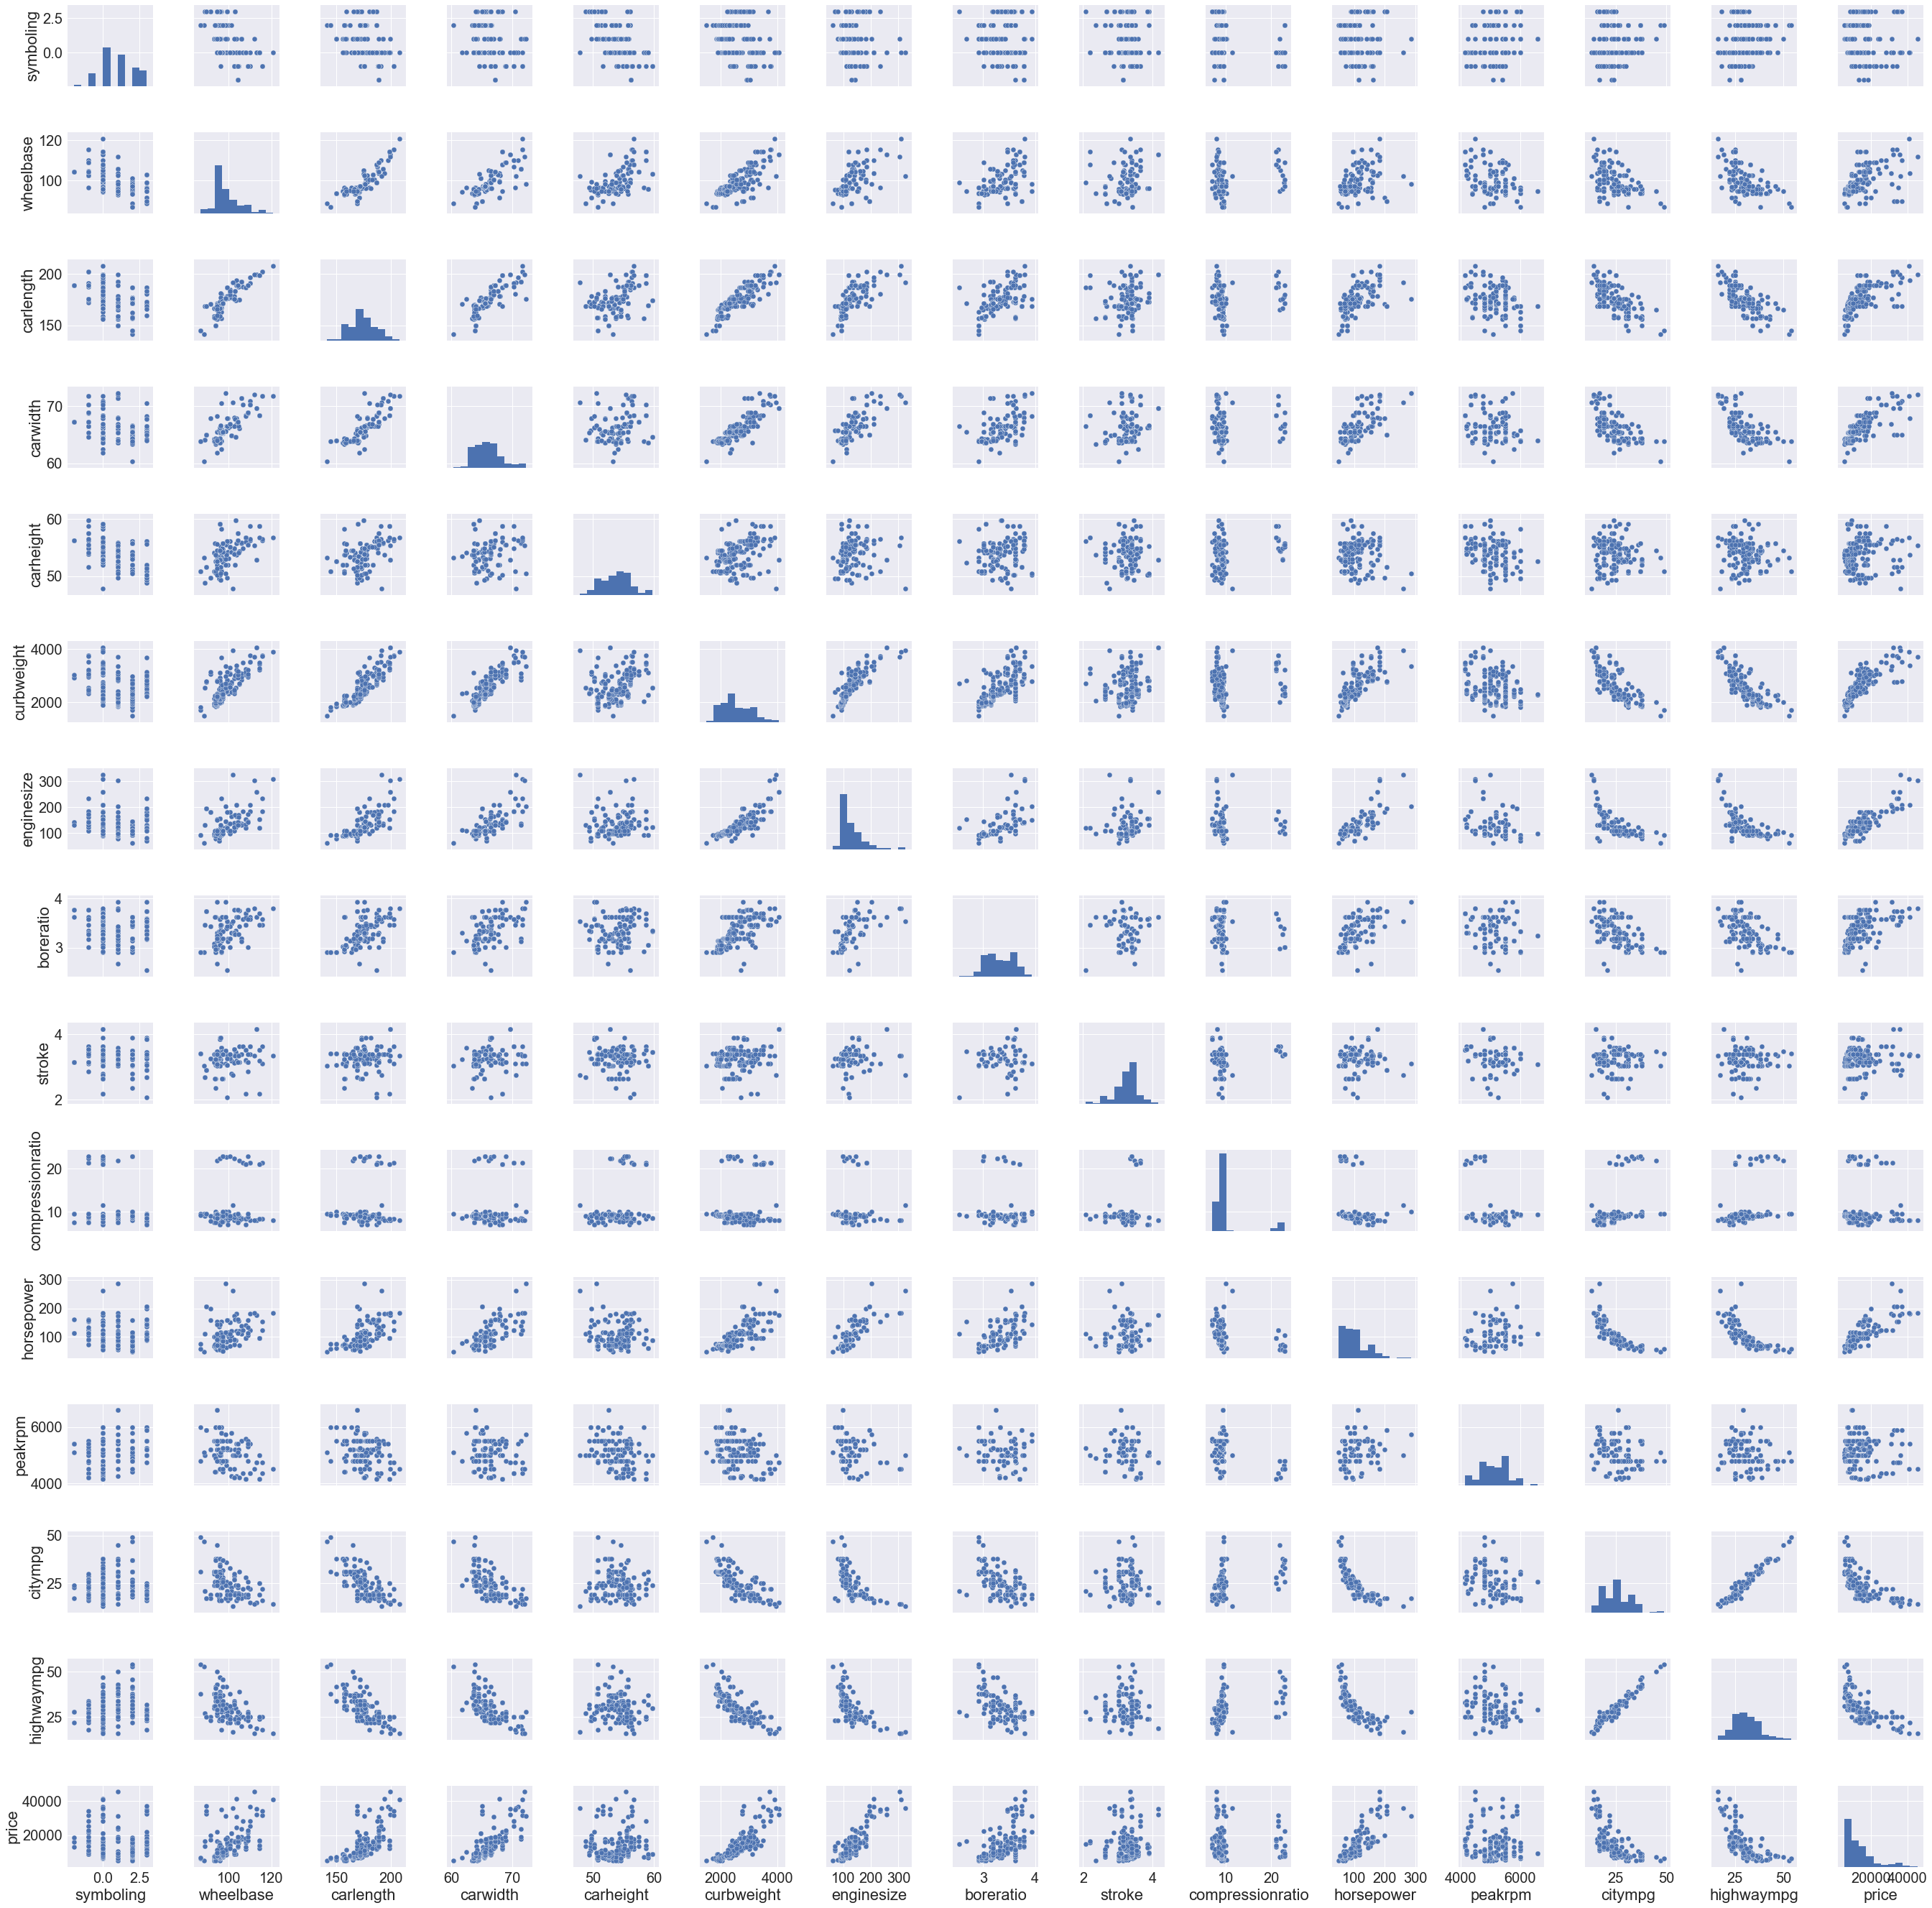

In [19]:
#Pairplot creation for variables to see the data points on the plot and identify the pattern of distribution
sns.set(font_scale=2)
sns.pairplot(car_details)
plt.show()

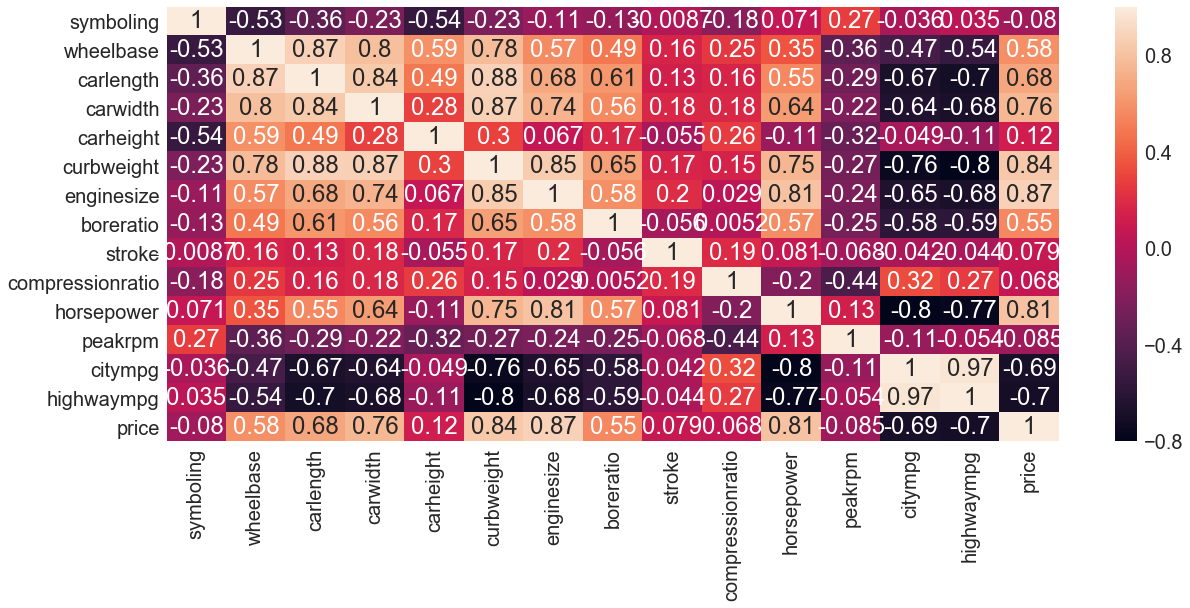

In [20]:
#Creating heatmap to identify Collinearity between variables.
plt.figure(figsize = (20,8))        # Size of the figure
sns.heatmap(car_details.corr(),annot = True)

<b> From the above heat map we can see high collinearity between few variables as mentioned below: </b> <br>
    1) Carlength and Wheelbase as 0.87 and Carwidth and Wheelbase as 0.8 --> Here we can drop Wheelbase <br>
    2) Carlength and Carwidth as 0.84 --> We can either one as they are highly correlated, we will retain Carlength <br>
    3) Carlength and Curbweight as 0.88 and Carwidth and Curbweight as 0.87 <br>
    4) Enginesize and Curbweight as 0.85 <br>
    5) Enginesize and Carlength as 0.68 and Enginesize and Carwidth as 0.74 <br>
considering point 3,4 and 5, we can see Curbweight can be dropped and Enginesize and Carlength can be retained. Thus we
will drop Wheelbase, Carwidth, Curbweight <br>
    6) Highwaympg and citympg as 0.97, so we can keep highwaympg. We can retain highwaympg because citympg and highway 
    almost equal correlation of 0.7 and 0.69 with price. So we will drop citympg <br>
    
Thus Overall we will drop 4 variables here as Wheelbase, Carwidth, Curbweight and Highwaympg in the next step. <br>


In [21]:
#Dropping four columns as identified above:

Cols_to_drop_due_to_correl = ['wheelbase', 'carwidth', 'curbweight', 'citympg']
car_details = car_details.drop(Cols_to_drop_due_to_correl, axis = 'columns')

# Creating Dummy Variables for all the categorical variables except Symboling which is already a numerical value

In [22]:
#Creating dummy variables for categorical variable CarName
dummies = pd.get_dummies(car_details['CarName'])
car_details = pd.concat([car_details,dummies], axis = 1)
car_details.drop(['CarName','Volvo'],axis='columns',inplace=True)
car_details.head()

symboling fueltype aspiration doornumber      carbody drivewheel  \
0          3      gas        std        two  convertible        rwd   
1          3      gas        std        two  convertible        rwd   
2          1      gas        std        two    hatchback        rwd   
3          2      gas        std       four        sedan        fwd   
4          2      gas        std       four        sedan        4wd   

  enginelocation  carlength  carheight enginetype     ...     Mitsubishi  \
0          front      168.8       48.8       dohc     ...              0   
1          front      168.8       48.8       dohc     ...              0   
2          front      171.2       52.4       ohcv     ...              0   
3          front      176.6       54.3        ohc     ...              0   
4          front      176.6       54.3        ohc     ...              0   

   Nissan Peugeot  Plymouth  Porsche  Renault  Saab  Subaru  Toyota  \
0       0       0         0        0        0     0       0       0   
1       0       0         0        0        0     0       0       0   
2       0       0         0        0        0     0       0       0   
3       0       0         0        0        0     0       0       0   
4       0       0         0        0        0     0       0       0   

   Volkswagen  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 41 columns]

In [23]:
#Creating dummy variables for categorical variable fueltype 
dummies_fuel_type = pd.get_dummies(car_details['fueltype'], prefix = 'fueltype')
car_details = pd.concat([car_details,dummies_fuel_type], axis = 1)
car_details.drop(['fueltype','fueltype_gas'],axis='columns',inplace=True)
car_details.head()

symboling aspiration doornumber      carbody drivewheel enginelocation  \
0          3        std        two  convertible        rwd          front   
1          3        std        two  convertible        rwd          front   
2          1        std        two    hatchback        rwd          front   
3          2        std       four        sedan        fwd          front   
4          2        std       four        sedan        4wd          front   

   carlength  carheight enginetype cylindernumber       ...         Nissan  \
0      168.8       48.8       dohc           four       ...              0   
1      168.8       48.8       dohc           four       ...              0   
2      171.2       52.4       ohcv            six       ...              0   
3      176.6       54.3        ohc           four       ...              0   
4      176.6       54.3        ohc           five       ...              0   

  Peugeot  Plymouth  Porsche  Renault  Saab  Subaru  Toyota  Volkswagen  \
0       0         0        0        0     0       0       0           0   
1       0         0        0        0     0       0       0           0   
2       0         0        0        0     0       0       0           0   
3       0         0        0        0     0       0       0           0   
4       0         0        0        0     0       0       0           0   

   fueltype_diesel  
0                0  
1                0  
2                0  
3                0  
4                0  

[5 rows x 41 columns]

In [24]:
#Creating dummy variables for categorical variable aspiration
dummies_aspiration = pd.get_dummies(car_details['aspiration'], prefix = 'aspiration')
car_details = pd.concat([car_details,dummies_aspiration], axis = 1)
car_details.drop(['aspiration','aspiration_turbo'],axis='columns',inplace=True)
car_details.head()

symboling doornumber      carbody drivewheel enginelocation  carlength  \
0          3        two  convertible        rwd          front      168.8   
1          3        two  convertible        rwd          front      168.8   
2          1        two    hatchback        rwd          front      171.2   
3          2       four        sedan        fwd          front      176.6   
4          2       four        sedan        4wd          front      176.6   

   carheight enginetype cylindernumber  enginesize       ...       Peugeot  \
0       48.8       dohc           four         130       ...             0   
1       48.8       dohc           four         130       ...             0   
2       52.4       ohcv            six         152       ...             0   
3       54.3        ohc           four         109       ...             0   
4       54.3        ohc           five         136       ...             0   

   Plymouth  Porsche  Renault  Saab  Subaru  Toyota  Volkswagen  \
0         0        0        0     0       0       0           0   
1         0        0        0     0       0       0           0   
2         0        0        0     0       0       0           0   
3         0        0        0     0       0       0           0   
4         0        0        0     0       0       0           0   

   fueltype_diesel  aspiration_std  
0                0               1  
1                0               1  
2                0               1  
3                0               1  
4                0               1  

[5 rows x 41 columns]

In [25]:
#Creating dummy variables for categorical variable doornumber
dummies_doornumber = pd.get_dummies(car_details['doornumber'], prefix = 'doornumber')
car_details = pd.concat([car_details,dummies_doornumber], axis = 1)
car_details.drop(['doornumber','doornumber_four'],axis='columns',inplace=True)
car_details.head()

symboling      carbody drivewheel enginelocation  carlength  carheight  \
0          3  convertible        rwd          front      168.8       48.8   
1          3  convertible        rwd          front      168.8       48.8   
2          1    hatchback        rwd          front      171.2       52.4   
3          2        sedan        fwd          front      176.6       54.3   
4          2        sedan        4wd          front      176.6       54.3   

  enginetype cylindernumber  enginesize fuelsystem       ...        Plymouth  \
0       dohc           four         130       mpfi       ...               0   
1       dohc           four         130       mpfi       ...               0   
2       ohcv            six         152       mpfi       ...               0   
3        ohc           four         109       mpfi       ...               0   
4        ohc           five         136       mpfi       ...               0   

   Porsche  Renault  Saab  Subaru  Toyota  Volkswagen  fueltype_diesel  \
0        0        0     0       0       0           0                0   
1        0        0     0       0       0           0                0   
2        0        0     0       0       0           0                0   
3        0        0     0       0       0           0                0   
4        0        0     0       0       0           0                0   

   aspiration_std  doornumber_two  
0               1               1  
1               1               1  
2               1               1  
3               1               0  
4               1               0  

[5 rows x 41 columns]

In [26]:
#Creating dummy variables for categorical variable carbody
dummies_carbody = pd.get_dummies(car_details['carbody'], prefix = 'carbody')
car_details = pd.concat([car_details,dummies_carbody], axis = 1)
car_details.drop(['carbody','carbody_wagon'],axis='columns',inplace=True)
car_details.head()

symboling drivewheel enginelocation  carlength  carheight enginetype  \
0          3        rwd          front      168.8       48.8       dohc   
1          3        rwd          front      168.8       48.8       dohc   
2          1        rwd          front      171.2       52.4       ohcv   
3          2        fwd          front      176.6       54.3        ohc   
4          2        4wd          front      176.6       54.3        ohc   

  cylindernumber  enginesize fuelsystem  boreratio      ...        Subaru  \
0           four         130       mpfi       3.47      ...             0   
1           four         130       mpfi       3.47      ...             0   
2            six         152       mpfi       2.68      ...             0   
3           four         109       mpfi       3.19      ...             0   
4           five         136       mpfi       3.19      ...             0   

   Toyota  Volkswagen  fueltype_diesel  aspiration_std  doornumber_two  \
0       0           0                0               1               1   
1       0           0                0               1               1   
2       0           0                0               1               1   
3       0           0                0               1               0   
4       0           0                0               1               0   

   carbody_convertible  carbody_hardtop  carbody_hatchback  carbody_sedan  
0                    1                0                  0              0  
1                    1                0                  0              0  
2                    0                0                  1              0  
3                    0                0                  0              1  
4                    0                0                  0              1  

[5 rows x 44 columns]

In [27]:
#Creating dummy variables for categorical variable drivewheel
dummies_drivewheel = pd.get_dummies(car_details['drivewheel'], prefix = 'drivewheel')
car_details = pd.concat([car_details,dummies_drivewheel], axis = 1)
car_details.drop(['drivewheel','drivewheel_4wd'],axis='columns',inplace=True)
car_details.head()

symboling enginelocation  carlength  carheight enginetype cylindernumber  \
0          3          front      168.8       48.8       dohc           four   
1          3          front      168.8       48.8       dohc           four   
2          1          front      171.2       52.4       ohcv            six   
3          2          front      176.6       54.3        ohc           four   
4          2          front      176.6       54.3        ohc           five   

   enginesize fuelsystem  boreratio  stroke       ...        Volkswagen  \
0         130       mpfi       3.47    2.68       ...                 0   
1         130       mpfi       3.47    2.68       ...                 0   
2         152       mpfi       2.68    3.47       ...                 0   
3         109       mpfi       3.19    3.40       ...                 0   
4         136       mpfi       3.19    3.40       ...                 0   

   fueltype_diesel  aspiration_std  doornumber_two  carbody_convertible  \
0                0               1               1                    1   
1                0               1               1                    1   
2                0               1               1                    0   
3                0               1               0                    0   
4                0               1               0                    0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  drivewheel_fwd  \
0                0                  0              0               0   
1                0                  0              0               0   
2                0                  1              0               0   
3                0                  0              1               1   
4                0                  0              1               0   

   drivewheel_rwd  
0               1  
1               1  
2               1  
3               0  
4               0  

[5 rows x 45 columns]

In [28]:
#Creating dummy variables for categorical variable enginelocation
dummies_enginelocation = pd.get_dummies(car_details['enginelocation'], prefix = 'enginelocation')
car_details = pd.concat([car_details,dummies_enginelocation], axis = 1)
car_details.drop(['enginelocation','enginelocation_rear'],axis='columns',inplace=True)
car_details.head()

symboling  carlength  carheight enginetype cylindernumber  enginesize  \
0          3      168.8       48.8       dohc           four         130   
1          3      168.8       48.8       dohc           four         130   
2          1      171.2       52.4       ohcv            six         152   
3          2      176.6       54.3        ohc           four         109   
4          2      176.6       54.3        ohc           five         136   

  fuelsystem  boreratio  stroke  compressionratio          ...           \
0       mpfi       3.47    2.68               9.0          ...            
1       mpfi       3.47    2.68               9.0          ...            
2       mpfi       2.68    3.47               9.0          ...            
3       mpfi       3.19    3.40              10.0          ...            
4       mpfi       3.19    3.40               8.0          ...            

   fueltype_diesel  aspiration_std  doornumber_two  carbody_convertible  \
0                0               1               1                    1   
1                0               1               1                    1   
2                0               1               1                    0   
3                0               1               0                    0   
4                0               1               0                    0   

   carbody_hardtop  carbody_hatchback  carbody_sedan  drivewheel_fwd  \
0                0                  0              0               0   
1                0                  0              0               0   
2                0                  1              0               0   
3                0                  0              1               1   
4                0                  0              1               0   

   drivewheel_rwd  enginelocation_front  
0               1                     1  
1               1                     1  
2               1                     1  
3               0                     1  
4               0                     1  

[5 rows x 45 columns]

In [29]:
#Creating dummy variables for categorical variable enginetype
dummies_enginetype = pd.get_dummies(car_details['enginetype'], prefix = 'enginetype')
car_details = pd.concat([car_details,dummies_enginetype], axis = 1)
car_details.drop(['enginetype','enginetype_rotor'],axis='columns',inplace=True)
car_details.head()

symboling  carlength  carheight cylindernumber  enginesize fuelsystem  \
0          3      168.8       48.8           four         130       mpfi   
1          3      168.8       48.8           four         130       mpfi   
2          1      171.2       52.4            six         152       mpfi   
3          2      176.6       54.3           four         109       mpfi   
4          2      176.6       54.3           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower       ...         \
0       3.47    2.68               9.0         111       ...          
1       3.47    2.68               9.0         111       ...          
2       2.68    3.47               9.0         154       ...          
3       3.19    3.40              10.0         102       ...          
4       3.19    3.40               8.0         115       ...          

   carbody_sedan  drivewheel_fwd  drivewheel_rwd  enginelocation_front  \
0              0               0               1                     1   
1              0               0               1                     1   
2              0               0               1                     1   
3              1               1               0                     1   
4              1               0               0                     1   

   enginetype_dohc  enginetype_dohcv  enginetype_l  enginetype_ohc  \
0                1                 0             0               0   
1                1                 0             0               0   
2                0                 0             0               0   
3                0                 0             0               1   
4                0                 0             0               1   

   enginetype_ohcf  enginetype_ohcv  
0                0                0  
1                0                0  
2                0                1  
3                0                0  
4                0                0  

[5 rows x 50 columns]

In [30]:
#Creating dummy variables for categorical variable cylindernumber
dummies_cylindernumber = pd.get_dummies(car_details['cylindernumber'], prefix = 'cylindernumber')
car_details = pd.concat([car_details,dummies_cylindernumber], axis = 1)
car_details.drop(['cylindernumber','cylindernumber_eight'],axis='columns',inplace=True)
car_details.head()

symboling  carlength  carheight  enginesize fuelsystem  boreratio  stroke  \
0          3      168.8       48.8         130       mpfi       3.47    2.68   
1          3      168.8       48.8         130       mpfi       3.47    2.68   
2          1      171.2       52.4         152       mpfi       2.68    3.47   
3          2      176.6       54.3         109       mpfi       3.19    3.40   
4          2      176.6       54.3         136       mpfi       3.19    3.40   

   compressionratio  horsepower  peakrpm         ...          enginetype_l  \
0               9.0         111     5000         ...                     0   
1               9.0         111     5000         ...                     0   
2               9.0         154     5000         ...                     0   
3              10.0         102     5500         ...                     0   
4               8.0         115     5500         ...                     0   

   enginetype_ohc  enginetype_ohcf  enginetype_ohcv  cylindernumber_five  \
0               0                0                0                    0   
1               0                0                0                    0   
2               0                0                1                    0   
3               1                0                0                    0   
4               1                0                0                    1   

   cylindernumber_four  cylindernumber_six  cylindernumber_three  \
0                    1                   0                     0   
1                    1                   0                     0   
2                    0                   1                     0   
3                    1                   0                     0   
4                    0                   0                     0   

   cylindernumber_twelve  cylindernumber_two  
0                      0                   0  
1                      0                   0  
2                      0                   0  
3                      0                   0  
4                      0                   0  

[5 rows x 55 columns]

In [31]:
#Creating dummy variables for categorical variable CarName
dummies_fuelsystem = pd.get_dummies(car_details['fuelsystem'], prefix = 'fuelsystem')
car_details = pd.concat([car_details,dummies_fuelsystem], axis = 1)
car_details.drop(['fuelsystem','fuelsystem_mpfi'],axis='columns',inplace=True)
car_details.head()

symboling  carlength  carheight  enginesize  boreratio  stroke  \
0          3      168.8       48.8         130       3.47    2.68   
1          3      168.8       48.8         130       3.47    2.68   
2          1      171.2       52.4         152       2.68    3.47   
3          2      176.6       54.3         109       3.19    3.40   
4          2      176.6       54.3         136       3.19    3.40   

   compressionratio  horsepower  peakrpm  highwaympg       ...         \
0               9.0         111     5000          27       ...          
1               9.0         111     5000          27       ...          
2               9.0         154     5000          26       ...          
3              10.0         102     5500          30       ...          
4               8.0         115     5500          22       ...          

   cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
0                     0                      0                   0   
1                     0                      0                   0   
2                     0                      0                   0   
3                     0                      0                   0   
4                     0                      0                   0   

   fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
0                0                0                0               0   
1                0                0                0               0   
2                0                0                0               0   
3                0                0                0               0   
4                0                0                0               0   

   fuelsystem_mfi  fuelsystem_spdi  fuelsystem_spfi  
0               0                0                0  
1               0                0                0  
2               0                0                0  
3               0                0                0  
4               0                0                0  

[5 rows x 61 columns]

In [32]:
car_details.columns #Checking columns created post dummy variables creation

Index(['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg',
       'price', 'Alfa-romero', 'Audi', 'Bmw', 'Buick', 'Chevrolet', 'Dodge',
       'Honda', 'Isuzu', 'Jaguar', 'Mazda', 'Mercury', 'Mitsubishi', 'Nissan',
       'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab', 'Subaru', 'Toyota',
       'Volkswagen', 'fueltype_diesel', 'aspiration_std', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 

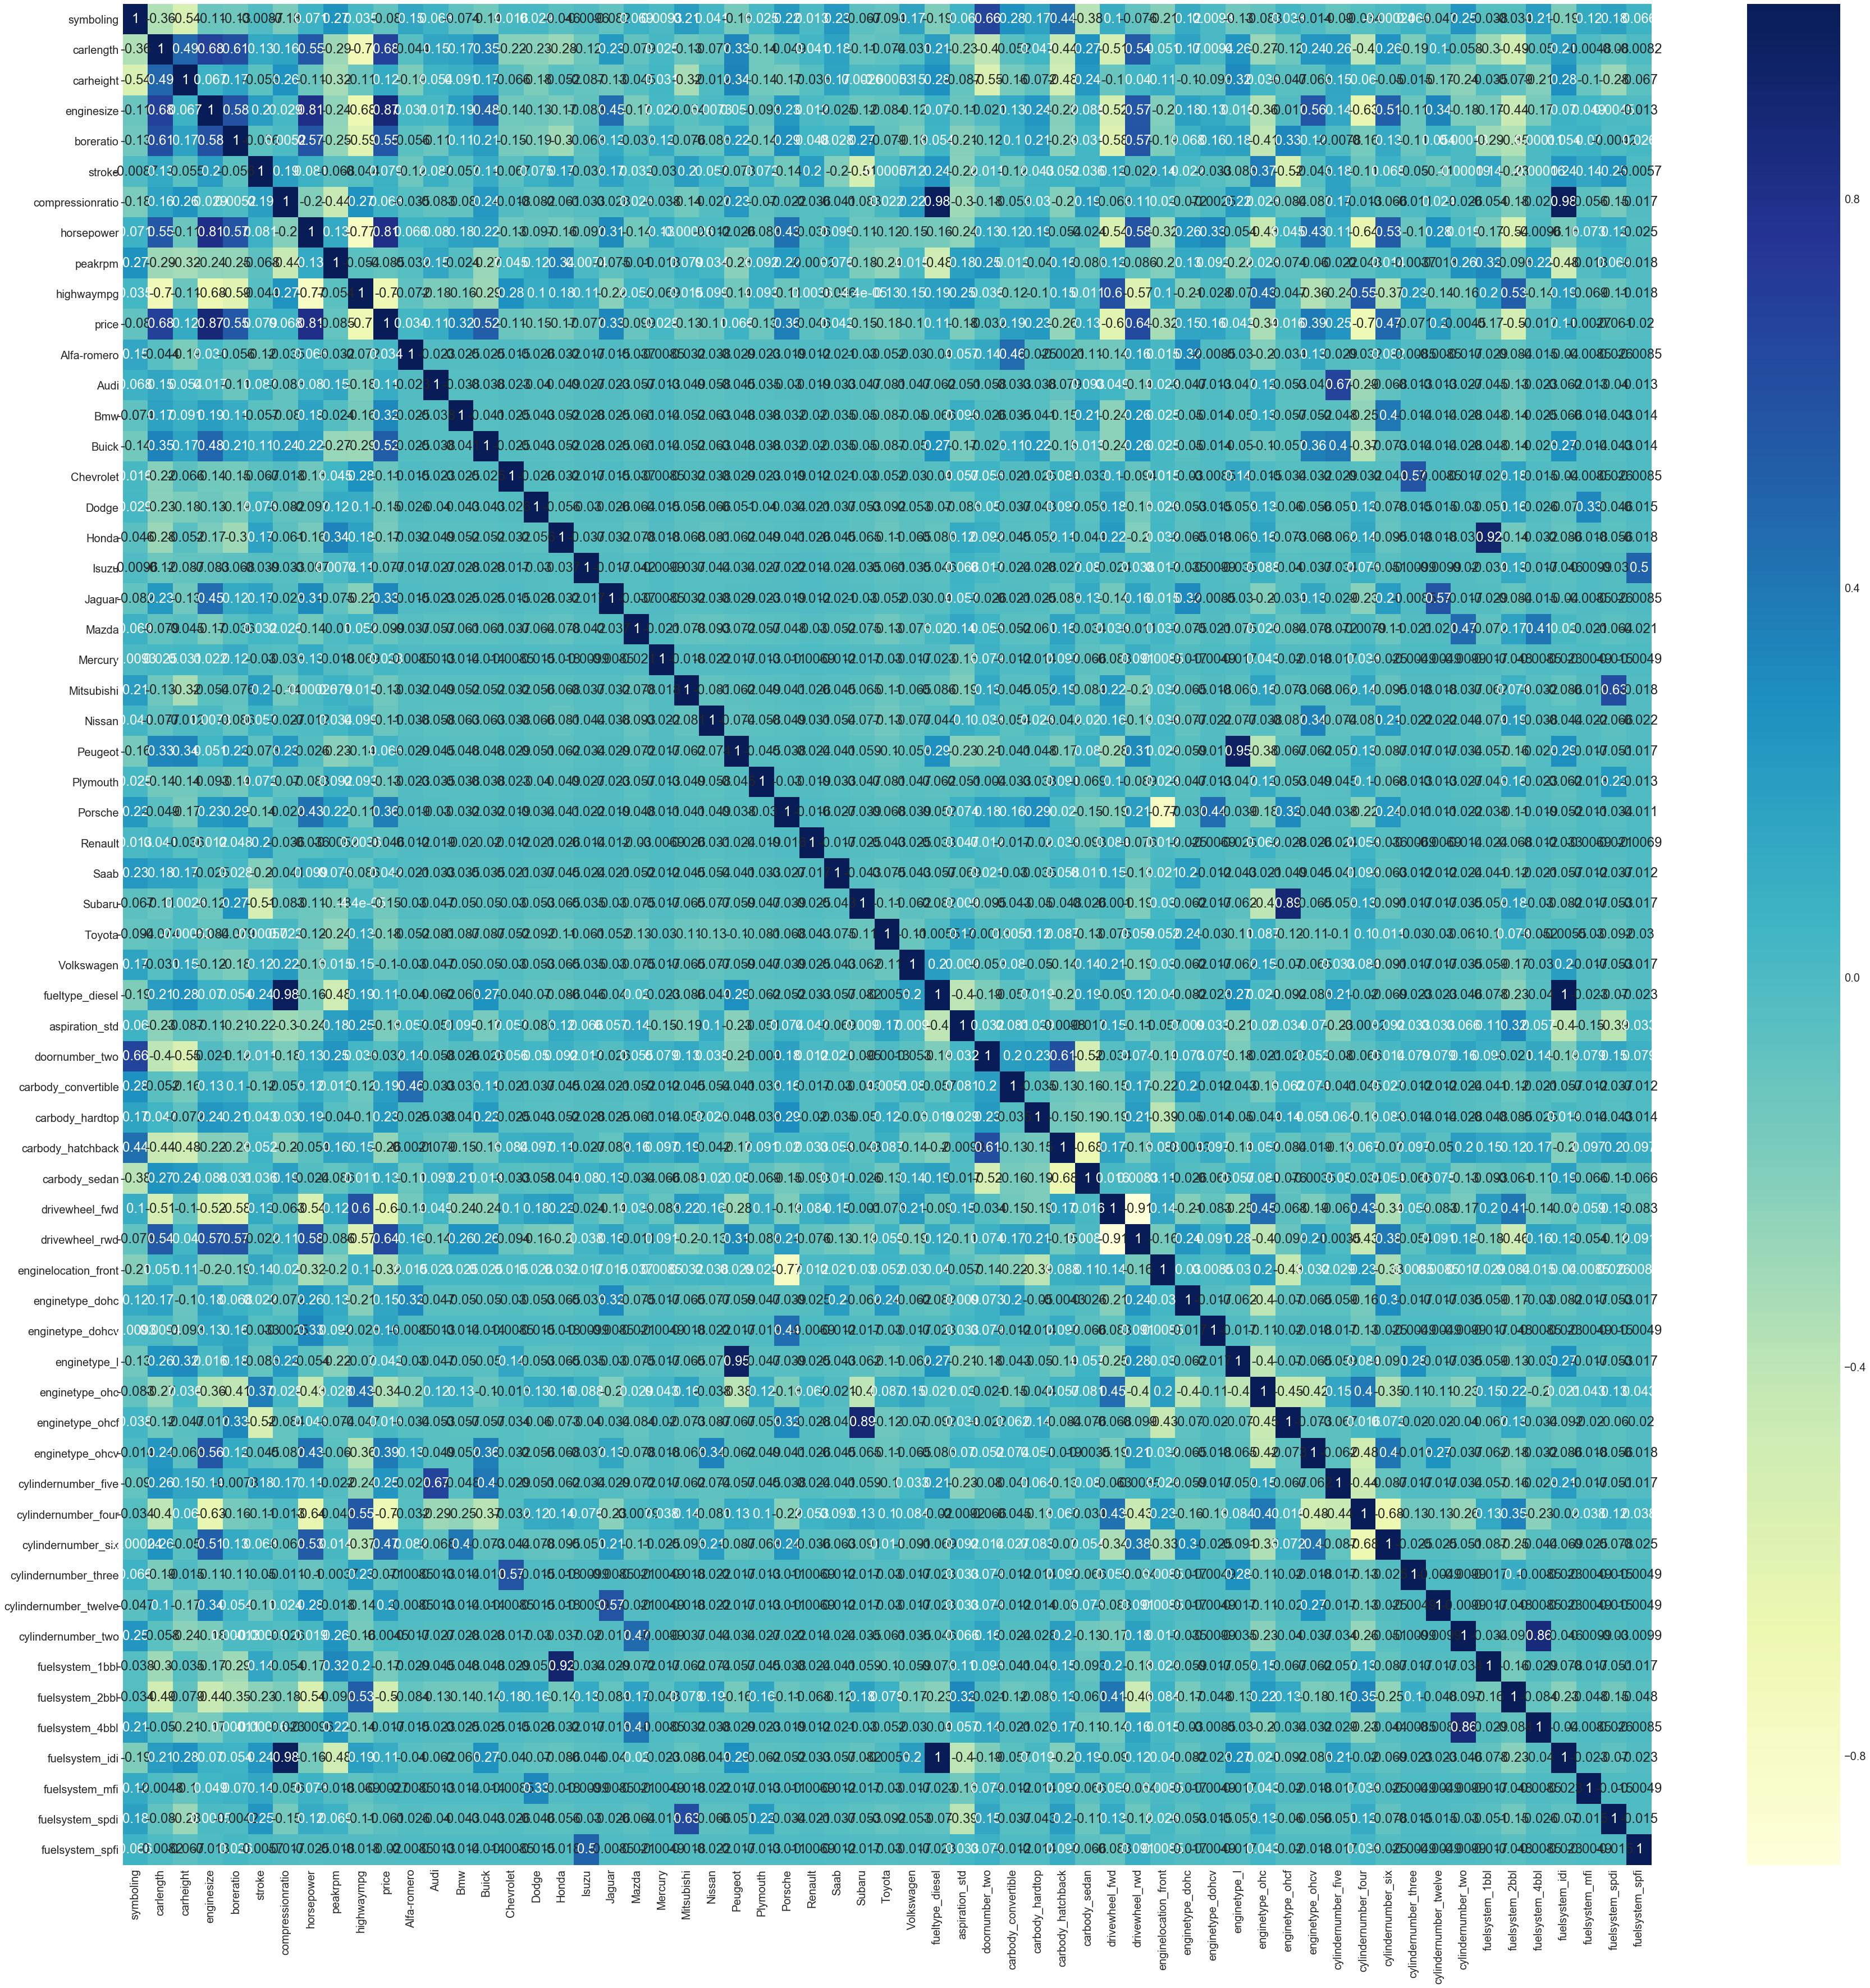

In [33]:
#Creating heatmap after dummy variable creation
plt.figure(figsize = (61, 61))
sns.heatmap(car_details.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Scaling all the numerical variables and creating train and test split

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [36]:
num_vars = ['symboling','carlength','carheight','enginesize','boreratio','stroke',
            'compressionratio','horsepower','peakrpm','highwaympg']

In [37]:
car_details[num_vars] = scaler.fit_transform(car_details[num_vars])

In [38]:
# We specify this so that the train and test data set always have the same rows, respectively
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(car_details, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
df_train.head() #Checking values for training dataset

symboling  carlength  carheight  enginesize  boreratio    stroke  \
122        0.6   0.391045   0.250000    0.139623   0.307143  0.552381   
125        1.0   0.414925   0.200000    0.339623   1.000000  0.495238   
166        0.6   0.411940   0.400000    0.139623   0.500000  0.480952   
1          1.0   0.413433   0.083333    0.260377   0.664286  0.290476   
199        0.2   0.711940   0.808333    0.260377   0.771429  0.514286   

     compressionratio  horsepower   peakrpm  highwaympg       ...         \
122           0.15000    0.083333  0.551020    0.578947       ...          
125           0.15625    0.395833  0.551020    0.289474       ...          
166           0.15000    0.266667  1.000000    0.342105       ...          
1             0.12500    0.262500  0.346939    0.289474       ...          
199           0.03125    0.475000  0.387755    0.157895       ...          

     cylindernumber_three  cylindernumber_twelve  cylindernumber_two  \
122                     0                      0                   0   
125                     0                      0                   0   
166                     0                      0                   0   
1                       0                      0                   0   
199                     0                      0                   0   

     fuelsystem_1bbl  fuelsystem_2bbl  fuelsystem_4bbl  fuelsystem_idi  \
122                0                1                0               0   
125                0                0                0               0   
166                0                0                0               0   
1                  0                0                0               0   
199                0                0                0               0   

     fuelsystem_mfi  fuelsystem_spdi  fuelsystem_spfi  
122               0                0                0  
125               0                0                0  
166               0                0                0  
1                 0                0                0  
199               0                0                0  

[5 rows x 61 columns]

In [40]:
y_train = df_train.pop('price')
X_train = df_train

In [41]:
X_train.columns

Index(['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg',
       'Alfa-romero', 'Audi', 'Bmw', 'Buick', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Mazda', 'Mercury', 'Mitsubishi', 'Nissan',
       'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab', 'Subaru', 'Toyota',
       'Volkswagen', 'fueltype_diesel', 'aspiration_std', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsyst

# Running RFE for feature selection for 15 features

In [42]:
# Importing libraries RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#Executing RFE with the output number of the variable equal to 15
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False  True False  True  True  True False  True  True False False False
  True False False False False False False False False False False False
 False  True False False False False False False  True False False False
 False False False False False False False False False False  True  True
  True False  True  True  True False False False False False False False]
[32  1 23  1  1  1 36  1  1 29 18 24  1 43  9  8 10 20 14 19 44  6 12  2
  7  1 11 31  4 15 13 34  1 28 21 42 40 37 39 30 41  3 22 25  5 17  1  1
  1 16  1  1  1 27 33 38 35 45 26 46]


In [43]:
X_train.columns[rfe.support_] #Columns retained by RFE

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'Bmw', 'Porsche', 'aspiration_std', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [44]:
X_train.columns

Index(['symboling', 'carlength', 'carheight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg',
       'Alfa-romero', 'Audi', 'Bmw', 'Buick', 'Chevrolet', 'Dodge', 'Honda',
       'Isuzu', 'Jaguar', 'Mazda', 'Mercury', 'Mitsubishi', 'Nissan',
       'Peugeot', 'Plymouth', 'Porsche', 'Renault', 'Saab', 'Subaru', 'Toyota',
       'Volkswagen', 'fueltype_diesel', 'aspiration_std', 'doornumber_two',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_front', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsyst

In [45]:
Cols_to_drop = X_train.columns[~rfe.support_] #Columns to be dropped after RFE for further Manual Analysis
Cols_to_drop

Index(['symboling', 'carheight', 'compressionratio', 'highwaympg',
       'Alfa-romero', 'Audi', 'Buick', 'Chevrolet', 'Dodge', 'Honda', 'Isuzu',
       'Jaguar', 'Mazda', 'Mercury', 'Mitsubishi', 'Nissan', 'Peugeot',
       'Plymouth', 'Renault', 'Saab', 'Subaru', 'Toyota', 'Volkswagen',
       'fueltype_diesel', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'cylindernumber_six', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

In [46]:
X_train_bkp = X_train # Taking backup of X_train dataset before we drop columns other than identified by 
                      # RFE for Analysis

In [47]:
X_train = X_train.drop(Cols_to_drop, axis = 'columns') #Retaining only columns identified by Recursive Feature 
                                                       #Elimination(RFE)

In [48]:
X_train.columns #Verifying columns if columns have been retained or not

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'Bmw', 'Porsche', 'aspiration_std', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

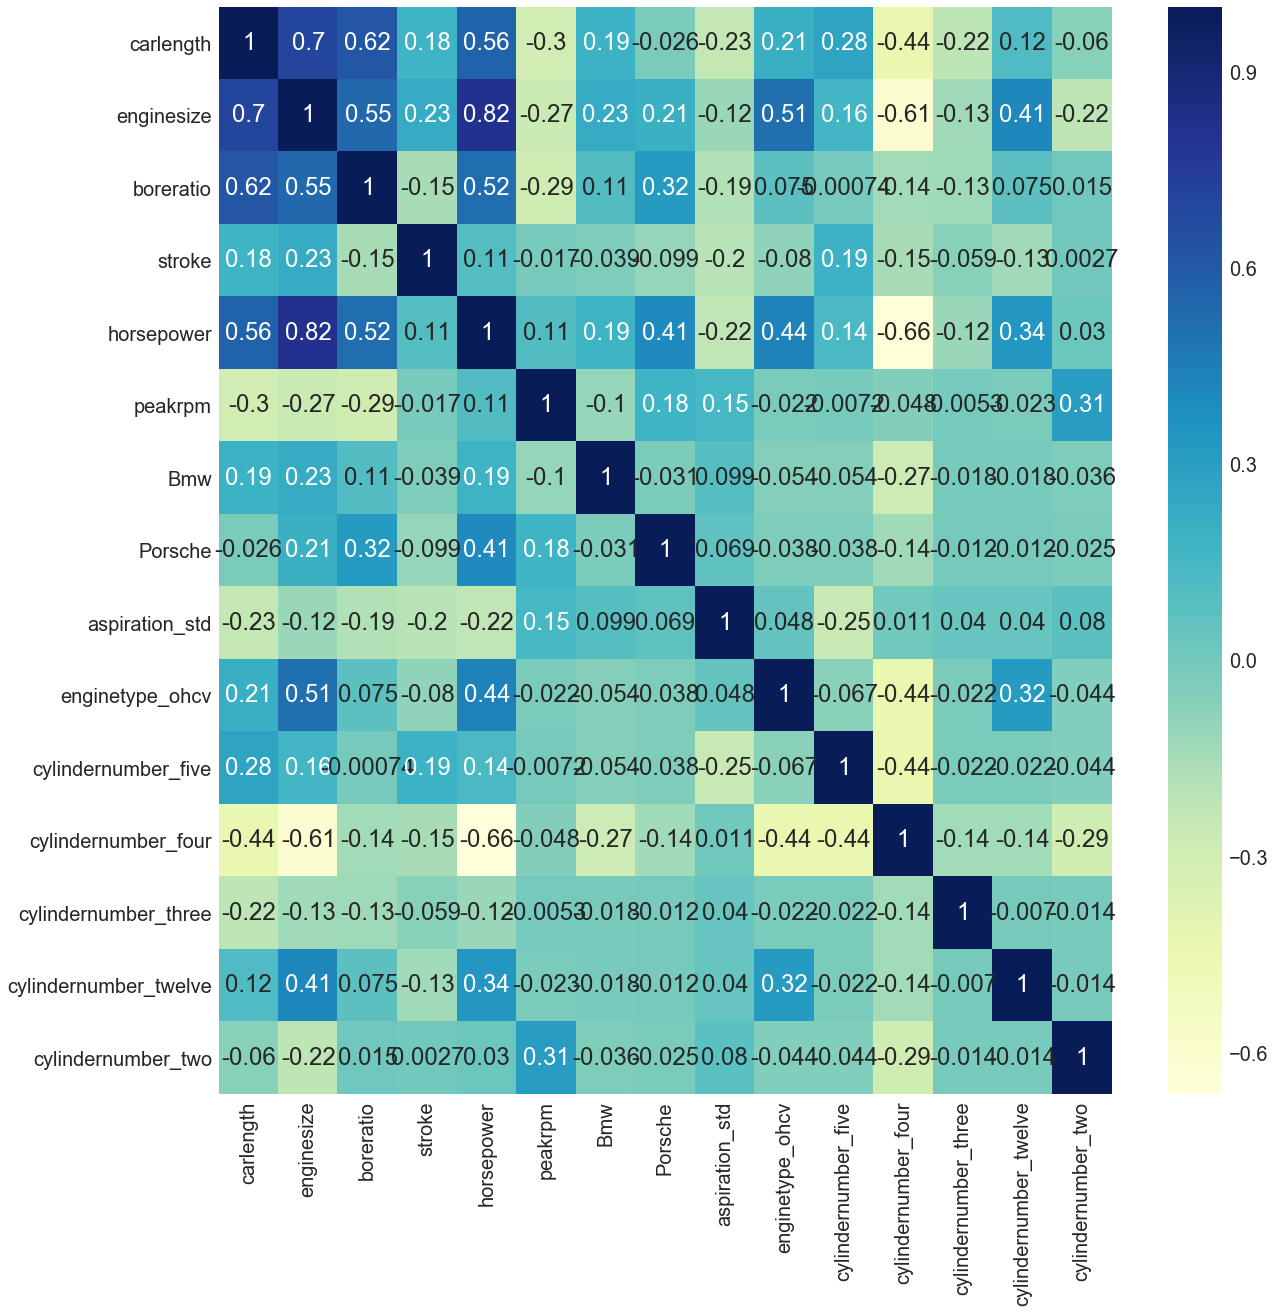

In [49]:
#Creating heatmap for columns identified in RFE to check collinearity
plt.figure(figsize = (20, 20))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()  

# Creating Models: 

<b> Building Model post RFE. Now since we have identified columns using RFE, let us now manually indetify columns to keep and drop. We will further use statistics we get using stats model to find the significant coefficients and use VIF to identify collinearity among variables </b>

<b> Creating Initial Model 0 with identified variables above after RFE </b>

In [50]:
#For Using statsmodel, we need to add a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train)

In [51]:
lm = sm.OLS(y_train,X_train_lm).fit() # Running a Linear Model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     117.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.54e-67
Time:                        16:03:03   Log-Likelihood:                -1291.0
No. Observations:                 143   AIC:                             2614.
Df Residuals:                     127   BIC:                             2661.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3506.01

In [52]:
lm.params #Checking coeffiecient values for the Linear Model

const                     3506.013904
carlength                 8700.489034
enginesize               72987.519961
boreratio               -16180.381225
stroke                  -14521.741286
horsepower               -3605.829203
peakrpm                   3841.771456
Bmw                       8280.747515
Porsche                  11291.952911
aspiration_std           -3348.812337
enginetype_ohcv          -2250.302003
cylindernumber_five       6807.100322
cylindernumber_four       7260.575081
cylindernumber_three     14418.885862
cylindernumber_twelve   -23254.053955
cylindernumber_two       21420.209426
dtype: float64

In [53]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
# Create a dataframe, which contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1              enginesize  79.21
2               boreratio  66.50
11    cylindernumber_four  42.23
3                  stroke  38.83
4              horsepower  26.83
0               carlength  25.57
5                 peakrpm  11.67
8          aspiration_std   7.19
14     cylindernumber_two   4.98
13  cylindernumber_twelve   2.89
10    cylindernumber_five   2.64
9         enginetype_ohcv   2.18
7                 Porsche   1.97
12   cylindernumber_three   1.52
6                     Bmw   1.44

<b> #Creating Linear Model 1 after identifying p-value and VIF values and we see horsepower p-value shows it as insignificant </b>

In [55]:
#Dropping horsepower as it shows as significant
X_train_1 = X_train.drop('horsepower',axis = 'columns')

In [56]:
X_train_lm_1 = sm.add_constant(X_train_1)
lm_1 = sm.OLS(y_train,X_train_lm_1).fit() # Running a Linear Model
print(lm_1.summary()) #Printing statistical Summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     125.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.28e-67
Time:                        16:03:03   Log-Likelihood:                -1291.6
No. Observations:                 143   AIC:                             2613.
Df Residuals:                     128   BIC:                             2658.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2962.33

In [57]:
lm_1.params #Checking coeffiecient values

const                     2962.336979
carlength                 8675.827835
enginesize               71517.031576
boreratio               -16879.583835
stroke                  -14495.095628
peakrpm                   2946.975345
Bmw                       8341.574645
Porsche                  10703.115110
aspiration_std           -3002.399428
enginetype_ohcv          -2186.238357
cylindernumber_five       7290.166464
cylindernumber_four       7932.818471
cylindernumber_three     15135.720025
cylindernumber_twelve   -24045.823277
cylindernumber_two       21822.739371
dtype: float64

In [58]:
#Create a dataframe, which contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1              enginesize  72.31
2               boreratio  61.82
3                  stroke  38.67
10    cylindernumber_four  38.47
0               carlength  25.47
4                 peakrpm   6.30
7          aspiration_std   5.51
13     cylindernumber_two   4.96
12  cylindernumber_twelve   2.81
9     cylindernumber_five   2.47
8         enginetype_ohcv   2.18
6                 Porsche   1.76
11   cylindernumber_three   1.50
5                     Bmw   1.44

<b> #Creating Model 2 after identifying p-value and VIF values and we see enginetype_ohcv can be dropped as it is insignificant </b>

In [59]:
X_train_2 = X_train_1.drop('enginetype_ohcv',axis = 'columns')

In [60]:
X_train_lm_2 = sm.add_constant(X_train_2)
lm_2 = sm.OLS(y_train,X_train_lm_2).fit() # Running a Linear Model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     132.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.11e-68
Time:                        16:03:03   Log-Likelihood:                -1293.7
No. Observations:                 143   AIC:                             2615.
Df Residuals:                     129   BIC:                             2657.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1788.53

In [61]:
lm_2.params #Checking for Coefficient values

const                     1788.539318
carlength                 9180.494208
enginesize               69062.644378
boreratio               -16344.408503
stroke                  -13402.894477
peakrpm                   2756.670070
Bmw                       9184.138955
Porsche                  11658.381223
aspiration_std           -2958.726689
cylindernumber_five       7977.701386
cylindernumber_four       8481.073730
cylindernumber_three     15698.905637
cylindernumber_twelve   -23703.795520
cylindernumber_two       22074.617918
dtype: float64

In [62]:
#Create a dataframe, which contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1              enginesize  64.81
2               boreratio  61.15
9     cylindernumber_four  38.45
3                  stroke  36.95
0               carlength  25.25
4                 peakrpm   5.93
7          aspiration_std   5.44
12     cylindernumber_two   4.94
11  cylindernumber_twelve   2.79
8     cylindernumber_five   2.40
6                 Porsche   1.60
10   cylindernumber_three   1.50
5                     Bmw   1.28

<b> #Creating Model 3 after VIF values and we see that boreratio can be dropped due to high VIF values </b>

In [63]:
X_train_3 = X_train_2.drop('boreratio',axis = 'columns')

In [64]:
X_train_lm_3 = sm.add_constant(X_train_3)
lm_3 = sm.OLS(y_train,X_train_lm_3).fit() # Running a Linear Model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     104.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.28e-60
Time:                        16:03:03   Log-Likelihood:                -1315.0
No. Observations:                 143   AIC:                             2656.
Df Residuals:                     130   BIC:                             2694.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1724.76

In [65]:
lm_3.params #Checking for Coefficient values

const                     1724.768984
carlength                 5221.034481
enginesize               42633.763631
stroke                   -4733.480205
peakrpm                   3405.320018
Bmw                       8032.572694
Porsche                   7622.254475
aspiration_std           -2470.697175
cylindernumber_five       4435.374822
cylindernumber_four       1093.226160
cylindernumber_three      6740.374645
cylindernumber_twelve    -9457.036566
cylindernumber_two        9841.322626
dtype: float64

In [66]:
#Create a dataframe, which contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1              enginesize  25.49
0               carlength  22.37
2                  stroke  19.66
8     cylindernumber_four  10.60
3                 peakrpm   5.87
6          aspiration_std   5.31
11     cylindernumber_two   2.07
7     cylindernumber_five   1.86
10  cylindernumber_twelve   1.81
5                 Porsche   1.37
4                     Bmw   1.24
9    cylindernumber_three   1.11

<b> #Creating Model 4 after identifying p-value and VIF values and we see cylindernumber_four can be dropped due to very high pvalue and it is insignificant </b>

In [67]:
X_train_4 = X_train_3.drop('cylindernumber_four',axis = 'columns')

In [68]:
X_train_lm_4 = sm.add_constant(X_train_4)
lm_4 = sm.OLS(y_train,X_train_lm_4).fit() # Running a Linear Model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     114.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.82e-61
Time:                        16:03:04   Log-Likelihood:                -1315.5
No. Observations:                 143   AIC:                             2655.
Df Residuals:                     131   BIC:                             2691.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3076.95

In [69]:
lm_4.params #Checking for Coefficient values

const                     3076.954235
carlength                 5748.750018
enginesize               39621.731370
stroke                   -4367.648151
peakrpm                   3130.193742
Bmw                       7724.223705
Porsche                   7872.154423
aspiration_std           -2555.355026
cylindernumber_five       3640.904251
cylindernumber_three      5412.291352
cylindernumber_twelve    -8135.825068
cylindernumber_two        8486.070469
dtype: float64

In [70]:
#Create a dataframe, which contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0               carlength  14.82
1              enginesize  12.51
2                  stroke  12.03
3                 peakrpm   5.78
6          aspiration_std   4.91
9   cylindernumber_twelve   1.55
5                 Porsche   1.33
7     cylindernumber_five   1.23
10     cylindernumber_two   1.20
4                     Bmw   1.19
8    cylindernumber_three   1.04

<b> #Creating Model 5 after identifying VIF values and we see stroke can be dropped due to VIF much greater than 10 </b>

In [71]:
X_train_5 = X_train_4.drop('stroke',axis = 'columns')

In [72]:
X_train_lm_5 = sm.add_constant(X_train_5)
lm_5 = sm.OLS(y_train,X_train_lm_5).fit() # Running a Linear Model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     118.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.88e-61
Time:                        16:03:04   Log-Likelihood:                -1319.4
No. Observations:                 143   AIC:                             2661.
Df Residuals:                     132   BIC:                             2693.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   770.18

In [73]:
lm_5.params #Checking for Coefficient values

const                      770.189429
carlength                 6581.846252
enginesize               36949.608508
peakrpm                   2821.953320
Bmw                       8113.534890
Porsche                   8984.209287
aspiration_std           -2328.009856
cylindernumber_five       3369.223883
cylindernumber_three      5614.593629
cylindernumber_twelve    -5341.600579
cylindernumber_two        8102.685475
dtype: float64

In [74]:
#Create a dataframe, which contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0              carlength  13.75
1             enginesize  11.44
5         aspiration_std   4.63
2                peakrpm   4.51
8  cylindernumber_twelve   1.40
4                Porsche   1.25
6    cylindernumber_five   1.23
9     cylindernumber_two   1.20
3                    Bmw   1.15
7   cylindernumber_three   1.03

<b> #Creating Model 6 after identifying p-value and VIF values and we see cylindernumber_twelve can be dropped as it is insignificant </b>

In [75]:
X_train_6 = X_train_5.drop('cylindernumber_twelve',axis = 'columns')

In [76]:
X_train_lm_6 = sm.add_constant(X_train_6)
lm_6 = sm.OLS(y_train,X_train_lm_6).fit() # Running a Linear Model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     129.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.27e-61
Time:                        16:03:04   Log-Likelihood:                -1321.1
No. Observations:                 143   AIC:                             2662.
Df Residuals:                     133   BIC:                             2692.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  941.8760 

In [77]:
lm_6.params #Checking for Coefficient values

const                     941.876034
carlength                7452.201864
enginesize              34648.614671
peakrpm                  2679.654305
Bmw                      8405.964290
Porsche                  9617.567946
aspiration_std          -2376.207552
cylindernumber_five      3457.754654
cylindernumber_three     5546.281889
cylindernumber_two       7824.069628
dtype: float64

In [78]:
#Create a dataframe, which contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0             carlength  11.67
1            enginesize   8.33
5        aspiration_std   4.63
2               peakrpm   4.51
6   cylindernumber_five   1.23
4               Porsche   1.19
8    cylindernumber_two   1.18
3                   Bmw   1.13
7  cylindernumber_three   1.03

<b> #Creating Model 7 after identifying p-value and VIF values and we see that carlength can be dropped  due to high VIF value (>10)</b>

In [79]:
X_train_7 = X_train_6.drop('carlength',axis = 'columns')

In [80]:
X_train_lm_7 = sm.add_constant(X_train_7)
lm_7 = sm.OLS(y_train,X_train_lm_7).fit() # Running a Linear Model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     128.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.06e-59
Time:                        16:03:04   Log-Likelihood:                -1329.6
No. Observations:                 143   AIC:                             2677.
Df Residuals:                     134   BIC:                             2704.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3689.9356 

In [81]:
lm_7.params #Checking for Coefficient values

const                    3689.935551
enginesize              40662.006068
peakrpm                  1804.929617
Bmw                      8725.355372
Porsche                  8394.166363
aspiration_std          -2758.161028
cylindernumber_five      4286.574909
cylindernumber_three     3519.354809
cylindernumber_two       8960.741818
dtype: float64

In [82]:
#Create a dataframe, which contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4        aspiration_std  4.36
1               peakrpm  4.13
0            enginesize  2.83
5   cylindernumber_five  1.17
7    cylindernumber_two  1.16
2                   Bmw  1.13
3               Porsche  1.09
6  cylindernumber_three  1.02

<b> #Creating Model 8 after identifying p-value and VIF values and we see that cylindernumber_three can be dropped due to p value and it is insignificant </b>

In [83]:
X_train_8 = X_train_7.drop('cylindernumber_three',axis = 'columns')

In [84]:
X_train_lm_8 = sm.add_constant(X_train_8)
lm_8 = sm.OLS(y_train,X_train_lm_8).fit() # Running a Linear Model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     146.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.95e-60
Time:                        16:03:05   Log-Likelihood:                -1330.4
No. Observations:                 143   AIC:                             2677.
Df Residuals:                     135   BIC:                             2701.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3792.9070    

In [85]:
lm_8.params #Checking for Coefficient values

const                   3792.906989
enginesize             40363.100426
peakrpm                 1739.004950
Bmw                     8741.314784
Porsche                 8446.988193
aspiration_std         -2734.564978
cylindernumber_five     4300.141247
cylindernumber_two      8896.925558
dtype: float64

In [86]:
#Create a dataframe, which contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_8.columns
vif['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
4       aspiration_std  4.32
1              peakrpm  4.12
0           enginesize  2.80
5  cylindernumber_five  1.17
6   cylindernumber_two  1.16
2                  Bmw  1.13
3              Porsche  1.09

<b> Creating Model 9 after identifying p-value and VIF values and we see that peakrpm can be dropped due to p value and it is insignificant </b>

In [87]:
X_train_9 = X_train_8.drop('peakrpm',axis = 'columns')

In [88]:
X_train_lm_9 = sm.add_constant(X_train_9)
lm_9 = sm.OLS(y_train,X_train_lm_9).fit() # Running a Linear Model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     169.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.57e-60
Time:                        16:03:05   Log-Likelihood:                -1331.4
No. Observations:                 143   AIC:                             2677.
Df Residuals:                     136   BIC:                             2697.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4510.9461    

In [89]:
lm_9.params #Checking for Coefficient values

const                   4510.946130
enginesize             39811.903403
Bmw                     8677.643307
Porsche                 8995.939869
aspiration_std         -2636.473725
cylindernumber_five     4410.918550
cylindernumber_two      9417.841221
dtype: float64

In [90]:
#Create a dataframe, which contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_9.columns
vif['VIF'] = [variance_inflation_factor(X_train_9.values, i) for i in range(X_train_9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0           enginesize  2.69
3       aspiration_std  2.38
4  cylindernumber_five  1.14
1                  Bmw  1.11
2              Porsche  1.07
5   cylindernumber_two  1.07

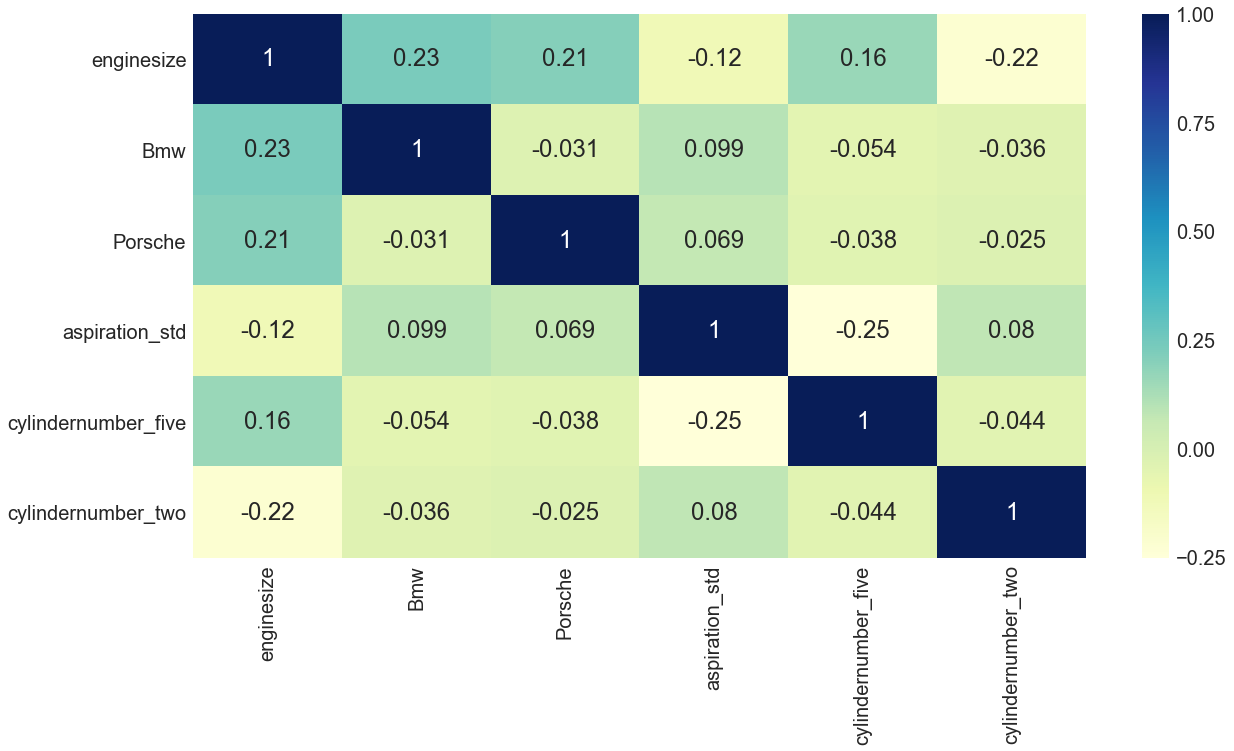

In [91]:
#Creating heatmap for variables in Training model number 9 to check for collinearity
plt.figure(figsize = (20, 10))
sns.heatmap(X_train_9.corr(), annot = True, cmap="YlGnBu")
plt.show()

<b> #Creating Model 10 dropping aspiration_std as it is very less negatively correlated to enginesize and does not seem to have much impact on the model </b>

In [92]:
X_train_10 = X_train_9.drop('aspiration_std', axis = 'columns')

In [93]:
X_train_lm_10 = sm.add_constant(X_train_10)
lm_10 = sm.OLS(y_train,X_train_lm_10).fit() # Running a Linear Model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     177.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.83e-58
Time:                        16:03:06   Log-Likelihood:                -1340.2
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     137   BIC:                             2710.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2162.6395    

In [94]:
lm_10.params #Checking for Coefficient values

const                   2162.639548
enginesize             40558.350680
Bmw                     8083.385834
Porsche                 8365.064228
cylindernumber_five     5335.200539
cylindernumber_two      9097.281083
dtype: float64

In [95]:
#Create a dataframe, which contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_10.columns
vif['VIF'] = [variance_inflation_factor(X_train_10.values, i) for i in range(X_train_10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0           enginesize  1.30
1                  Bmw  1.11
3  cylindernumber_five  1.11
2              Porsche  1.07
4   cylindernumber_two  1.00

In [96]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [97]:
#Predicting the price in training dataset to get error term by subtracting 
#y_train and y_train_price(predicted value in training data set)

y_train_price = lm_10.predict(X_train_lm_10)

In [98]:
print(y_train_price)

122     7825.503605
125    24302.237969
166     7825.503605
1      12723.115763
199    12723.115763
190     9509.057784
96      7672.453225
177    11498.712723
181    17467.677540
97      7672.453225
120     6601.100566
117    13335.317282
57     12637.374050
44      6601.100566
153     6907.201326
85     11498.712723
127    30883.404306
151     6907.201326
204    14406.669942
10     17439.393238
20      6601.100566
170    15171.921841
82     16702.425641
12     26010.214514
16     32897.481610
178    18998.181339
90      8590.755505
89      7672.453225
45      6601.100566
161     7825.503605
           ...     
129    32260.857725
159     9662.108164
132    11345.662343
108    16090.224121
155     6907.201326
130    13029.216522
86     11498.712723
93      7672.453225
137    11345.662343
144     9356.007404
58     14167.877849
60     11498.712723
107    11192.611963
143     9356.007404
203    15018.871461
34      6907.201326
14     26010.214514
66     13335.317282
53      6754.150946


Text(0.5,0,'Errors')

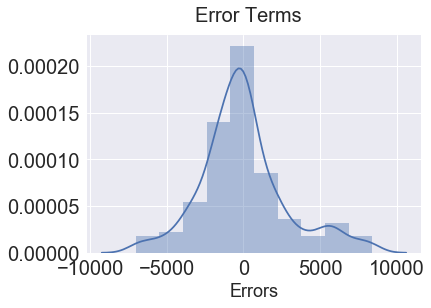

In [99]:
# Plotting histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<b> Above graph shows that Error Terms are Normally Distributed </b>

# Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 10th Model(lm_10).

In [100]:
y_test = df_test.pop('price') #Getting price column in y_test dataframe
X_test = df_test #Contains all variables except price as it is popped out from dataframe

In [101]:
X_test_bkp = X_test #Taking backup of test dataset

In [102]:
X_test_bkp.shape #verifying backup of test dataset

(62, 60)

<b> We will drop columns from X_test(test dataset) those have been dropped from Training dataset post the RFE was run </b>

In [103]:
X_test = X_test.drop(Cols_to_drop, axis = 'columns') #Retaining columns post RFE

In [104]:
X_test.columns

Index(['carlength', 'enginesize', 'boreratio', 'stroke', 'horsepower',
       'peakrpm', 'Bmw', 'Porsche', 'aspiration_std', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

<b> We will drop columns from X_test(test dataset) those have been dropped during model building such that now X_train and X_test contain same variables </b>

In [105]:
Cols_dropped_during_model_making = ['horsepower', 'enginetype_ohcv', 'boreratio','cylindernumber_four','stroke',
                                    'cylindernumber_twelve','carlength','cylindernumber_three','peakrpm',
                                    'aspiration_std']
X_test = X_test.drop(Cols_dropped_during_model_making, axis = 'columns')

In [106]:
X_test.columns

Index(['enginesize', 'Bmw', 'Porsche', 'cylindernumber_five',
       'cylindernumber_two'],
      dtype='object')

In [107]:
X_test_m10 = sm.add_constant(X_test) #Adding constant column to test dataset

In [108]:
y_pred_m10 = lm_10.predict(X_test_m10) #Predicting price values using model by feeding Test data

In [109]:
print(y_pred_m10)

160     7825.503605
186     9509.057784
59     11498.712723
165     7825.503605
140     9356.007404
64     11498.712723
198    12723.115763
75     14253.619562
172    15171.921841
104    20528.685139
200    14406.669942
136    11345.662343
111    11192.611963
41      9662.108164
73     39966.083389
31      6907.201326
156     7825.503605
133    11345.662343
65     14253.619562
83     16702.425641
195    14406.669942
197    14406.669942
126    30883.404306
118     6601.100566
167    15171.921841
101    20528.685139
124    16702.425641
69     26169.986438
11     17439.393238
46     11039.561583
           ...     
110    16090.224121
201    14406.669942
115    11192.611963
174     9662.108164
134    11345.662343
169    15171.921841
92      7672.453225
173    11498.712723
74     39353.881869
3       9509.057784
157     7825.503605
81     11498.712723
32      4917.546387
99     11192.611963
26      6601.100566
88      9662.108164
184     7672.453225
187     7672.453225
52      6754.150946


# Model Evaluation

Text(0,0.5,'y_pred_m10')

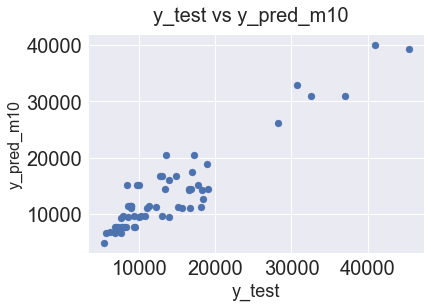

In [110]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m10)
fig.suptitle('y_test vs y_pred_m10', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_m10', fontsize = 16) 

Text(0,0.5,'Car Price')

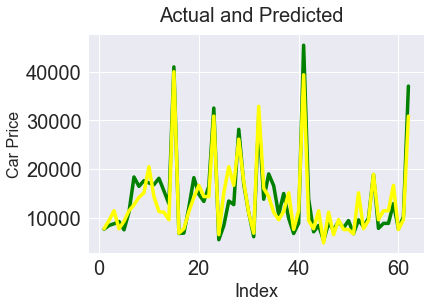

In [111]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="green", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_m10, color="yellow",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)  

# Calculating the R-squared score on the test set.

In [112]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m10)

0.8661555026972831

# We can see that the equation of our best fitted line is:

# $ price = 40558.350680  \times  enginesize + 8083.385834  \times  Bmw + 8365.06422 \times Porsche + 5335.200539 \times cylindernumber_five + 9097.281083 \times cylindernumber_two + 2162.639548 $


<b>Coeffiecients  </b> <br>
1) enginesize             40558.350680 <br>
2) Bmw                     8083.385834 <br>
3) Porsche                 8365.064228 <br>
4) cylindernumber_five     5335.200539 <br>
5) cylindernumber_two      9097.281083 <br>

<b>Intercept  </b> <br>
const                   2162.639548

# Conclusions: 

# 1) Car price is largely governed by Enginesize, larger the size, more the car price.
# 2) Bmw and Porsche are the two car models which have better chances of getting higher price in market.
# 3) Cylinder Number as two and five are important in car price prediction.